# MNIST

## MNISTデータをフェッチ

In [9]:
# 本来はこれで取れるが、なぜか「Internal Server Eroor」になるので、次の方法で代替する
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [6]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    mnist_path = os.path.join(".", "datasets", "mnist-original.mat")

    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")
    
# Source : https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter

Done!


In [11]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [15]:
X, y = mnist["data"], mnist["target"]
X.shape #教師データ、70000のデータで、１つのデータの特徴量は784(28*28)

(70000, 784)

In [25]:
X[123] # 適当に１つのデータを見て見る
# 0（白）~255(黒)のピクセルの明度が入っていることがわかる

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94,
       109, 191, 255, 222,  41,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       218, 247, 252, 252, 253, 200,  21,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
y.shape #正解ラベル

(70000,)

In [37]:
import numpy as np
print(np.where(y == 0)) #適当に「0」の位置を確認
print(np.where(y == 5))
print(np.where(y == 9))
# 0~9までのデータが順番に格納されていることがわかる

print(y[59990:60000])
print(y[60000:60010])
# さらに0~60000番目までは教師データ、60001~70000番目まではテストデータという具合に分けられていることがわかる

(array([    0,     1,     2, ..., 60977, 60978, 60979]),)
(array([30596, 30597, 30598, ..., 66028, 66029, 66030]),)
(array([54051, 54052, 54053, ..., 69997, 69998, 69999]),)
[ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## データから数字を描画してみる

(784,)
5.0
(28, 28)


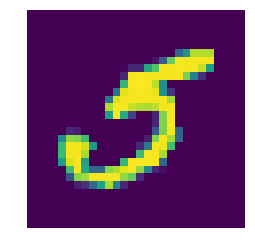

In [72]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] # 36000番目のデータ見てみる
print(some_digit.shape)
print(y[36000])
some_digit_image = some_digit.reshape(28, 28)
print(some_digit_image.shape)
plt.imshow(some_digit_image)
# plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

plt.show()

## 訓練セットとテストセットに分ける

In [73]:
# それぞれを変数に格納
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]
print(len(X_tarin), len(X_test), len(y_train), len(y_test))

60000 10000 60000 10000


In [74]:
# 訓練セットをシャッフルしておく
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

## 二項分類器の訓練 (5かどうかを見分ける判別器)

In [75]:
y_train_5 = (y_train == 5) #各要素にアクセスし、５ならばTrue, それ以外はFalseにする

In [76]:
y_test_5 = (y_test == 5)

In [77]:
# 確率的勾配降下法で試してみる
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/uno/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [78]:
sgd_clf.predict([some_digit]) #さきほど描画した９番を予測してみる --> 確かにFalseになる

array([ True], dtype=bool)

## 性能評価
分類タスクの評価は回帰に比べ、難しい

In [79]:
# 交差検証の実装(cross_val_scoreでやる場合)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9647,  0.9645,  0.9512])

In [88]:
# 層化抽出を行なって、各クラスの比率にあったフォールドを作成する場合
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

# 精度が90%を超えているが、これは5が全体の10％の割合でしか含まれないからであり、決して高い数字ではない

0.9647
0.9645
0.9512
